# k-Vizinhos mais Próximos

In [1]:
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import euclidean_distances

## Gerando os dados

In [2]:
np.random.seed(42)

X = 2.0 * np.random.rand(100, 1) - 1.0
fase = np.random.rand() * 2.0 * np.pi
y = np.sum(
    np.random.rand() * np.sin(X * 2 * np.pi + fase), 
    axis=1
).reshape(-1, 1)
y += np.random.normal(scale=0.1, size=(100, 1))

Text(0, 0.5, 'y')

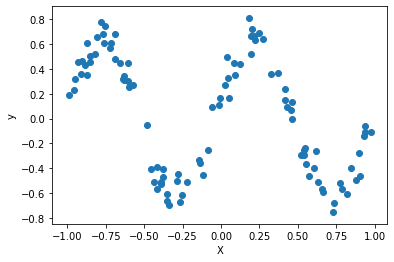

In [3]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

## Ajuste Linear

In [4]:
lr = LinearRegression().fit(X, y)

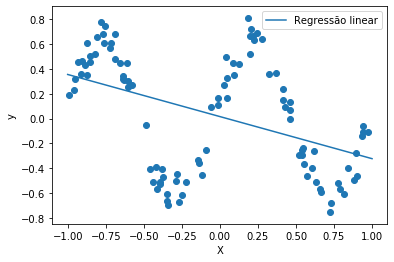

In [5]:
x = np.linspace(-1, 1, 100)
pred = lr.predict(x.reshape(-1, 1))

plt.scatter(X, y)
plt.plot(x, pred, label='Regressão linear')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

## k-Vizinhos para Regressão

In [6]:
def predict_regression(X_train, y_train, new_X, k=1):
    distances = euclidean_distances(new_X, X_train)
    nearest = np.argsort(distances, axis=1)
    return np.mean(
        y_train.T[:, nearest[:,:k]].reshape(-1, k), axis=1
    ).reshape(-1, 1)

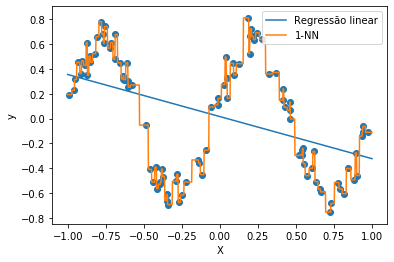

In [7]:
np.random.seed(7)
new_X = np.linspace(-1, 1, 1000).reshape(-1, 1)
pred_1NN = predict_regression(X, y, new_X, k=1)

plt.scatter(X, y)
plt.plot(x, pred, label='Regressão linear')
plt.plot(new_X, pred_1NN, label='1-NN')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

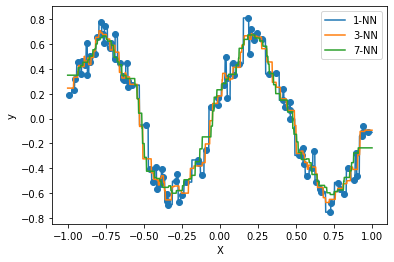

In [8]:
pred_1NN = predict_regression(X, y, new_X, k=1)
pred_3NN = predict_regression(X, y, new_X, k=3)
pred_7NN = predict_regression(X, y, new_X, k=7)

plt.scatter(X, y)
plt.plot(new_X, pred_1NN, label='1-NN')
plt.plot(new_X, pred_3NN, label='3-NN')
plt.plot(new_X, pred_7NN, label='7-NN')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

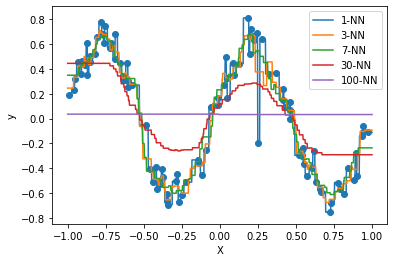

In [9]:
X_ = np.vstack((X, [[0.25]]))
y_ = np.vstack((y, [[-0.2]]))

pred_1NN = predict_regression(X_, y_, new_X, k=1)
pred_3NN = predict_regression(X_, y_, new_X, k=3)
pred_7NN = predict_regression(X_, y_, new_X, k=7)
pred_30NN = predict_regression(X_, y_, new_X, k=30)
pred_100NN = predict_regression(X_, y_, new_X, k=100)

plt.scatter(X_, y_)
plt.plot(new_X, pred_1NN, label='1-NN')
plt.plot(new_X, pred_3NN, label='3-NN')
plt.plot(new_X, pred_7NN, label='7-NN')
plt.plot(new_X, pred_30NN, label='30-NN')
plt.plot(new_X, pred_100NN, label='100-NN')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [53]:
def predict_regression_weighted(X_train, y_train, new_X, k=1):
    eps = 1e-8
    distances = euclidean_distances(new_X, X_train)
    nearest = np.argsort(distances, axis=1)
    rows = np.arange(len(new_X)).reshape(-1,1)
    nearest_distances = distances[rows, nearest[:,:k]]
    weights = 1.0 / (nearest_distances + eps)
    weights = weights / np.sum(weights, axis=1).reshape(-1, 1)
    return np.sum(
        y_train.T[:, nearest[:,:k]].reshape(-1, k) * weights, axis=1
    ).reshape(-1, 1)

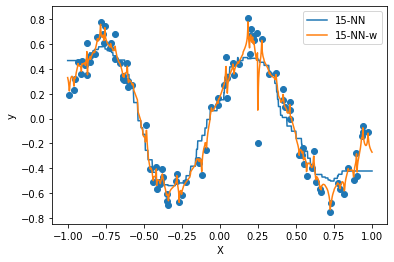

In [54]:
X_ = np.vstack((X, [[0.25]]))
y_ = np.vstack((y, [[-0.2]]))
pred_15NN = predict_regression(X_, y_, new_X, k=15)
pred_15NN_weighted = predict_regression_weighted(X_, y_, new_X, k=15)

plt.scatter(X_, y_)
plt.plot(new_X, pred_15NN, label='15-NN')
plt.plot(new_X, pred_15NN_weighted, label='15-NN-w')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

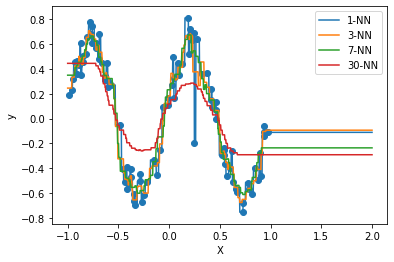

In [12]:
new_X_ = np.linspace(-1, 2, 1000).reshape(-1, 1)

pred_1NN_ = predict_regression(X_, y_, new_X_, k=1)
pred_3NN_ = predict_regression(X_, y_, new_X_, k=3)
pred_7NN_ = predict_regression(X_, y_, new_X_, k=7)
pred_30NN_ = predict_regression(X_, y_, new_X_, k=30)

plt.scatter(X_, y_)
plt.plot(new_X_, pred_1NN_, label='1-NN')
plt.plot(new_X_, pred_3NN_, label='3-NN')
plt.plot(new_X_, pred_7NN_, label='7-NN')
plt.plot(new_X_, pred_30NN_, label='30-NN')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

## k-Vizinhos para Classificação

In [13]:
np.random.seed(42)
N = 250
p = 2
X_clas = 2.0 * np.random.rand(N, 2) - 1.0

a  = 4.0 * np.random.rand(1, p) - 2.0
x1 = (2.0 * np.random.rand(1, p) - 1.0) * 0.3
x2 = (2.0 * np.random.rand(1, p) - 1.0) * 0.7
x3 = (2.0 * np.random.rand(1, p) - 1.0) * 1.1
x4 = (2.0 * np.random.rand(1, p) - 1.0) * 1.4
x5 = (2.0 * np.random.rand(1, p) - 1.0) * 1.7
y_clas  = np.sum(
    a * (X_clas - x1) * (X_clas - x2) * (
        X_clas - x3
    ) * (X_clas - x4) * (X_clas - x5), axis=1
)
y_clas += np.random.normal(scale=0.1, size=N)

y_clas = (X_clas[:,1] > y_clas).astype(int)

noise_ratio = 0.1
n_noise = int(N * noise_ratio)
idx_noise = np.random.choice(N, n_noise)
y_clas[idx_noise] = (1 - y_clas[idx_noise])

Text(0, 0.5, '$X_2$')

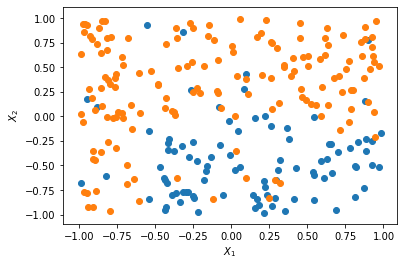

In [14]:
X0, X1 = X_clas[y_clas == 0], X_clas[y_clas == 1]  
    
plt.scatter(X0[:, 0], X0[:, 1])  
plt.scatter(X1[:, 0], X1[:, 1])   
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')                   

In [15]:
def predict_classification(X_train, y_train, new_X, k=1):
    distances = euclidean_distances(new_X, X_train)
    nearest = np.argsort(distances, axis=1)
    labels = y_train.T[:, nearest[:,:k]].reshape(-1, k)
    counts = np.apply_along_axis(
        np.bincount, axis=1, arr=labels,
        minlength = np.max(y_train) +1
    )
    return np.argmax(counts, axis=1)

Text(0, 0.5, '$X_2$')

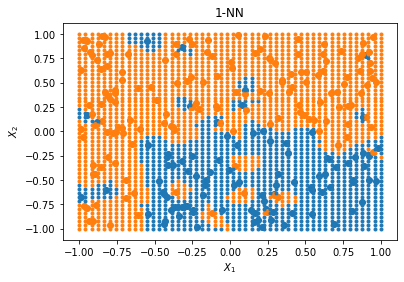

In [16]:
x_ = np.linspace(-1, 1, 50)
new_X_clas = np.array(list((product(x_, x_))))
y_clas = y_clas.reshape(-1, 1)

pred_1NN_clas = predict_classification(X_clas, y_clas, new_X_clas, k=1)
X0_, X1_ = new_X_clas[pred_1NN_clas==0], new_X_clas[pred_1NN_clas==1]

plt.scatter(X0[:, 0], X0[:, 1], c='tab:blue')  
plt.scatter(X1[:, 0], X1[:, 1], c='tab:orange') 
plt.scatter(X0_[:, 0], X0_[:, 1], c='tab:blue', marker='.')  
plt.scatter(X1_[:, 0], X1_[:, 1], c='tab:orange', marker='.') 
plt.title('1-NN')  
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')             

Text(0, 0.5, '$X_2$')

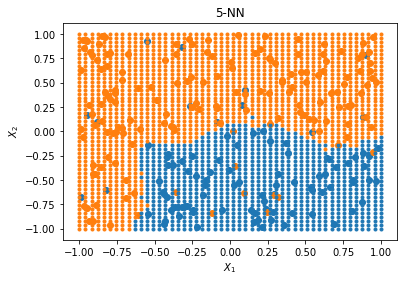

In [17]:
pred_5NN_clas = predict_classification(X_clas, y_clas, new_X_clas, k=5)
X0_5, X1_5 = new_X_clas[pred_5NN_clas==0], new_X_clas[pred_5NN_clas==1]

plt.scatter(X0[:, 0], X0[:, 1], c='tab:blue')  
plt.scatter(X1[:, 0], X1[:, 1], c='tab:orange') 
plt.scatter(X0_5[:, 0], X0_5[:, 1], c='tab:blue', marker='.')  
plt.scatter(X1_5[:, 0], X1_5[:, 1], c='tab:orange', marker='.') 
plt.title('5-NN')  
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')             

Text(0, 0.5, '$X_2$')

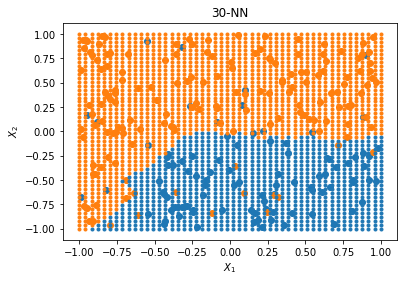

In [18]:
pred_30NN_clas = predict_classification(X_clas, y_clas, new_X_clas, k=30)
X0_30, X1_30 = new_X_clas[pred_30NN_clas==0], new_X_clas[pred_30NN_clas==1]

plt.scatter(X0[:, 0], X0[:, 1], c='tab:blue')  
plt.scatter(X1[:, 0], X1[:, 1], c='tab:orange') 
plt.scatter(X0_30[:, 0], X0_30[:, 1], c='tab:blue', marker='.')  
plt.scatter(X1_30[:, 0], X1_30[:, 1], c='tab:orange', marker='.') 
plt.title('30-NN')  
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')   

### Estimando Probabilidades

In [21]:
def predict_proba(X_train, y_train, new_X, k=1):
    distances = euclidean_distances(new_X, X_train)
    nearest = np.argsort(distances, axis=1)
    labels = y_train.T[:, nearest[:,:k]].reshape(-1, k)
    counts = np.apply_along_axis(
        np.bincount, axis=1, arr=labels,
        minlength = np.max(y_train) +1
    )
    return counts / np.sum(counts, axis=1).reshape(-1, 1)

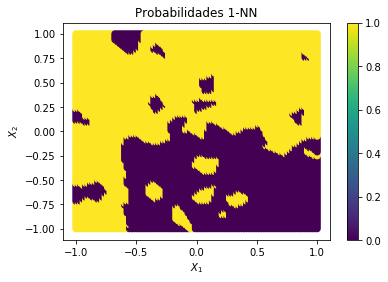

In [37]:
x_larger = np.linspace(-1, 1, 100)
new_X_clas_ = np.array(list((product(x_larger, x_larger))))

probs_1NN_clas = predict_proba(X_clas, y_clas, new_X_clas_, k=1)[:, 1]

plt.scatter(new_X_clas_[:, 0], new_X_clas_[:, 1], c=probs_1NN_clas)  
plt.title('Probabilidades 1-NN')  
plt.xlabel('$X_1$')
plt.ylabel('$X_2$') 
plt.colorbar()

Text(0.5, 0, 'Probabilidades 1-NN')

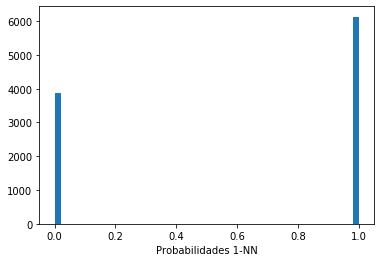

In [34]:
plt.hist(probs_1NN_clas, bins=50)
plt.xlabel('Probabilidades 1-NN')

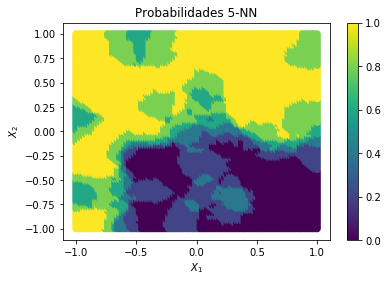

In [31]:
probs_5NN_clas = predict_proba(X_clas, y_clas, new_X_clas_, k=5)[:, 1]

plt.scatter(new_X_clas_[:, 0], new_X_clas_[:, 1], c=probs_5NN_clas)  
plt.title('Probabilidades 5-NN')  
plt.xlabel('$X_1$')
plt.ylabel('$X_2$') 
plt.colorbar()

Text(0.5, 0, 'Probabilidades 5-NN')

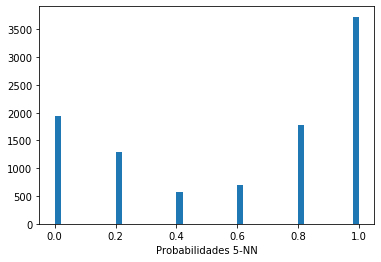

In [35]:
plt.hist(probs_5NN_clas, bins=50)
plt.xlabel('Probabilidades 5-NN')

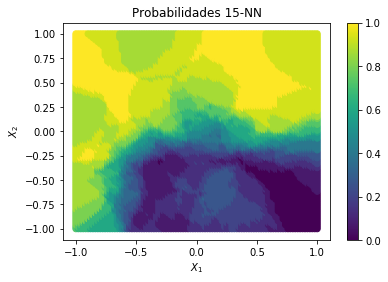

In [32]:
probs_15NN_clas = predict_proba(X_clas, y_clas, new_X_clas_, k=15)[:, 1]

plt.scatter(new_X_clas_[:, 0], new_X_clas_[:, 1], c=probs_15NN_clas)  
plt.title('Probabilidades 15-NN')  
plt.xlabel('$X_1$')
plt.ylabel('$X_2$') 
plt.colorbar()

Text(0.5, 0, 'Probabilidades 15-NN')

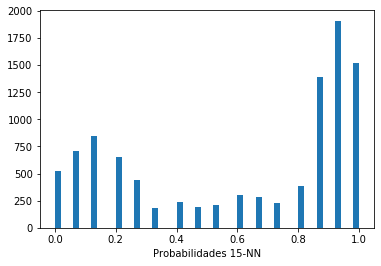

In [36]:
plt.hist(probs_15NN_clas, bins=50)
plt.xlabel('Probabilidades 15-NN')